Uploading Data on google drive so Colab could use it

In [0]:
!pip install dowhy
import numpy as np
import pandas as pd
import dowhy
from dowhy import CausalModel
import dowhy.datasets
import dowhy.api


In [0]:
from google.colab import files
uploaded = files.upload()

Importing Data as Pandas Dataframe

In [0]:
import pandas as pd
import io
df = pd.read_excel(io.BytesIO(uploaded['no_removal_preprocessed_data.xlsx']), index_col = 0)
df.head()




Creating a causal mode

In [0]:
model= CausalModel(
        data=df,
        treatment='gender',
        outcome="target",
        common_causes=['SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
        instruments=[])
model.view_model(layout="dot")

#### Setting treatment column type to bool

In [0]:
df.gender = df.gender.apply(bool)
# True indicates Male and False indicates Female

In [27]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,target,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,False,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,True,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,True,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,True,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,False,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [28]:

corr = df.corr()['target'].sort_values()

# Display correlations
print('Top 10 - Positive Correlations:')
print('-----------------------------------')
print(corr.tail(10))
print('\nTop 10 - Negative Correlations:')
print('------------------------------')
print(corr.head(10))
print('------------------------------')
print(corr)


Top 10 - Positive Correlations:
-----------------------------------
PaperlessBilling                  0.191825
MonthlyCharges                    0.193356
DeviceProtection_No               0.252481
OnlineBackup_No                   0.268005
PaymentMethod_Electronic check    0.301919
InternetService_Fiber optic       0.308020
TechSupport_No                    0.337281
OnlineSecurity_No                 0.342637
Contract_Month-to-month           0.405103
target                            1.000000
Name: target, dtype: float64

Top 10 - Negative Correlations:
------------------------------
tenure                                 -0.352229
Contract_Two year                      -0.302253
OnlineBackup_No internet service       -0.227890
InternetService_No                     -0.227890
DeviceProtection_No internet service   -0.227890
TechSupport_No internet service        -0.227890
StreamingTV_No internet service        -0.227890
StreamingMovies_No internet service    -0.227890
OnlineSecurity_No

In [0]:
y = df.target
X = df.drop(['target'], axis = 1)

In [0]:
!pip uninstall matplotlib

!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config

!sudo pip install pygraphviz

!pip install graphviz

#!pip show matplotlib


View Model

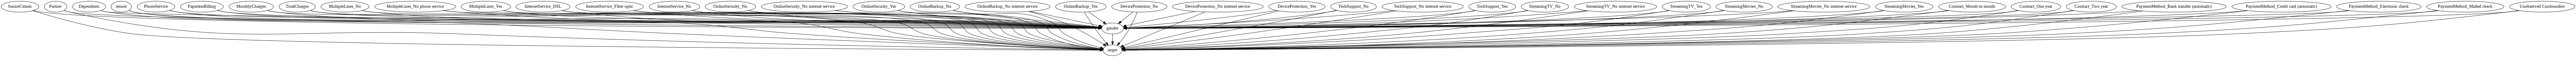

In [31]:

from IPython.display import Image, display
display(Image(filename="causal_model.png"))

Identify effect

In [32]:
identified_estimand = model.identify_effect()
print(identified_estimand)


INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['OnlineSecurity_No', 'MultipleLines_No phone service', 'StreamingTV_No internet service', 'PaymentMethod_Mailed check', 'OnlineBackup_Yes', 'StreamingMovies_Yes', 'SeniorCitizen', 'Partner', 'DeviceProtection_Yes', 'InternetService_Fiber optic', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'Contract_Month-to-month', 'PhoneService', 'PaymentMethod_Bank transfer (automatic)', 'OnlineBackup_No', 'U', 'StreamingMovies_No', 'TotalCharges', 'InternetService_No', 'PaperlessBilling', 'tenure', 'StreamingTV_No', 'OnlineSecurity_Yes', 'DeviceProtection_No', 'Dependents', 'MultipleLines_Yes', 'MultipleLines_No', 'StreamingMovies_No internet service', 'PaymentMethod_Credit card (automatic)', 'OnlineSecurity_No internet service', 'TechSupport_No', 'PaymentMethod_Electronic check', 'InternetService_DSL', 'Contract_Two year', 'MonthlyCharges', 'OnlineBackup_No internet service', 'Contract_One year', 'Te

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
─────────(Expectation(target|OnlineSecurity_No,MultipleLines_No phone service,
d[gender]                                                                     

                                                                              
StreamingTV_No internet service,PaymentMethod_Mailed check,OnlineBackup_Yes,St
                                                                              

                                                                              
reamingMovies_Yes,SeniorCitizen,Partner,DeviceProtection_Yes,InternetService_F
                                                                              

                                                                              
iber optic,DeviceProtection_No internet service,TechSupport_No internet servic
                                 

In [33]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)


INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['OnlineSecurity_No', 'MultipleLines_No phone service', 'StreamingTV_No internet service', 'PaymentMethod_Mailed check', 'OnlineBackup_Yes', 'StreamingMovies_Yes', 'SeniorCitizen', 'Partner', 'DeviceProtection_Yes', 'InternetService_Fiber optic', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'Contract_Month-to-month', 'PhoneService', 'PaymentMethod_Bank transfer (automatic)', 'OnlineBackup_No', 'U', 'StreamingMovies_No', 'TotalCharges', 'InternetService_No', 'PaperlessBilling', 'tenure', 'StreamingTV_No', 'OnlineSecurity_Yes', 'DeviceProtection_No', 'Dependents', 'MultipleLines_Yes', 'MultipleLines_No', 'StreamingMovies_No internet service', 'PaymentMethod_Credit card (automatic)', 'OnlineSecurity_No internet service', 'TechSupport_No', 'PaymentMethod_Electronic check', 'InternetService_DSL', 'Contract_Two year', 'MonthlyCharges', 'OnlineBackup_No internet service', 'Contract_One year', 'Te

Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
─────────(Expectation(target|OnlineSecurity_No,MultipleLines_No phone service,
d[gender]                                                                     

                                                                              
StreamingTV_No internet service,PaymentMethod_Mailed check,OnlineBackup_Yes,St
                                                                              

                                                                              
reamingMovies_Yes,SeniorCitizen,Partner,DeviceProtection_Yes,InternetService_F
                                                                              

                                                                              
iber optic,DeviceProtection_No internet service,TechSupport_No internet servic
                                 

Estimate effect

In [34]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: target~gender+OnlineSecurity_No+MultipleLines_No phone service+StreamingTV_No internet service+PaymentMethod_Mailed check+OnlineBackup_Yes+StreamingMovies_Yes+SeniorCitizen+Partner+DeviceProtection_Yes+InternetService_Fiber optic+DeviceProtection_No internet service+TechSupport_No internet service+Contract_Month-to-month+PhoneService+PaymentMethod_Bank transfer (automatic)+OnlineBackup_No+StreamingMovies_No+TotalCharges+InternetService_No+PaperlessBilling+tenure+StreamingTV_No+OnlineSecurity_Yes+DeviceProtection_No+Dependents+MultipleLines_Yes+MultipleLines_No+StreamingMovies_No internet service+PaymentMethod_Credit card (automatic)+OnlineSecurity_No internet service+TechSupport_No+PaymentMethod_Electronic check+InternetService_DSL+Contract_Two year+MonthlyCharges+OnlineBackup_No internet service+Contract_One year+TechSupport_Yes+StreamingTV_Yes
/usr/local/lib/python3.6/dist

*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
─────────(Expectation(target|OnlineSecurity_No,MultipleLines_No phone service,
d[gender]                                                                     

                                                                              
StreamingTV_No internet service,PaymentMethod_Mailed check,OnlineBackup_Yes,St
                                                                              

                                                                              
reamingMovies_Yes,SeniorCitizen,Partner,DeviceProtection_Yes,InternetService_F
                                                                              

                                                                              
iber optic,DeviceProtection_No internet service,TechSupport_No inter

In [35]:
# Causal effect on the control group (ATC)
causal_estimate_att = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification",
        target_units = "atc")
print(causal_estimate_att)
print("Causal Estimate is " + str(causal_estimate_att.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: target~gender+OnlineSecurity_No+MultipleLines_No phone service+StreamingTV_No internet service+PaymentMethod_Mailed check+OnlineBackup_Yes+StreamingMovies_Yes+SeniorCitizen+Partner+DeviceProtection_Yes+InternetService_Fiber optic+DeviceProtection_No internet service+TechSupport_No internet service+Contract_Month-to-month+PhoneService+PaymentMethod_Bank transfer (automatic)+OnlineBackup_No+StreamingMovies_No+TotalCharges+InternetService_No+PaperlessBilling+tenure+StreamingTV_No+OnlineSecurity_Yes+DeviceProtection_No+Dependents+MultipleLines_Yes+MultipleLines_No+StreamingMovies_No internet service+PaymentMethod_Credit card (automatic)+OnlineSecurity_No internet service+TechSupport_No+PaymentMethod_Electronic check+InternetService_DSL+Contract_Two year+MonthlyCharges+OnlineBackup_No internet service+Contract_One year+TechSupport_Yes+StreamingTV_Yes
/usr/local/lib/python3.6/dist

*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
─────────(Expectation(target|OnlineSecurity_No,MultipleLines_No phone service,
d[gender]                                                                     

                                                                              
StreamingTV_No internet service,PaymentMethod_Mailed check,OnlineBackup_Yes,St
                                                                              

                                                                              
reamingMovies_Yes,SeniorCitizen,Partner,DeviceProtection_Yes,InternetService_F
                                                                              

                                                                              
iber optic,DeviceProtection_No internet service,TechSupport_No inter

In [36]:
# Identify causal effect and return target estimands
identified_estimand = model.identify_effect()

# Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")

# Refute the obtained estimate using multiple robustness checks.
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['OnlineSecurity_No', 'MultipleLines_No phone service', 'StreamingTV_No internet service', 'PaymentMethod_Mailed check', 'OnlineBackup_Yes', 'StreamingMovies_Yes', 'SeniorCitizen', 'Partner', 'DeviceProtection_Yes', 'InternetService_Fiber optic', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'Contract_Month-to-month', 'PhoneService', 'PaymentMethod_Bank transfer (automatic)', 'OnlineBackup_No', 'U', 'StreamingMovies_No', 'TotalCharges', 'InternetService_No', 'PaperlessBilling', 'tenure', 'StreamingTV_No', 'OnlineSecurity_Yes', 'DeviceProtection_No', 'Dependents', 'MultipleLines_Yes', 'MultipleLines_No', 'StreamingMovies_No internet service', 'PaymentMethod_Credit card (automatic)', 'OnlineSecurity_No internet service', 'TechSupport_No', 'PaymentMethod_Electronic check', 'InternetService_DSL', 'Contract_Two year', 'MonthlyCharges', 'OnlineBackup_No internet service', 'Contract_One year', 'Te

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: target~gender+OnlineSecurity_No+MultipleLines_No phone service+StreamingTV_No internet service+PaymentMethod_Mailed check+OnlineBackup_Yes+StreamingMovies_Yes+SeniorCitizen+Partner+DeviceProtection_Yes+InternetService_Fiber optic+DeviceProtection_No internet service+TechSupport_No internet service+Contract_Month-to-month+PhoneService+PaymentMethod_Bank transfer (automatic)+OnlineBackup_No+StreamingMovies_No+TotalCharges+InternetService_No+PaperlessBilling+tenure+StreamingTV_No+OnlineSecurity_Yes+DeviceProtection_No+Dependents+MultipleLines_Yes+MultipleLines_No+StreamingMovies_No internet service+PaymentMethod_Credit card (automatic)+OnlineSecurity_No internet service+TechSupport_No+PaymentMethod_Electronic check+InternetService_DSL+Contract_Two year+MonthlyCharges+OnlineBackup_No internet service+Cont

In [37]:
print(refute_results)

Refute: Add a Random Common Cause
Estimated effect:(-0.008945051824506603,)
New effect:(0.001561834445548772,)



In [38]:
print(estimate)

*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
─────────(Expectation(target|OnlineSecurity_No,MultipleLines_No phone service,
d[gender]                                                                     

                                                                              
StreamingTV_No internet service,PaymentMethod_Mailed check,OnlineBackup_Yes,St
                                                                              

                                                                              
reamingMovies_Yes,SeniorCitizen,Partner,DeviceProtection_Yes,InternetService_F
                                                                              

                                                                              
iber optic,DeviceProtection_No internet service,TechSupport_No inter

In [39]:
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9, random_seed = 1)
print(res_subset)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: target~gender+OnlineSecurity_No+MultipleLines_No phone service+StreamingTV_No internet service+PaymentMethod_Mailed check+OnlineBackup_Yes+StreamingMovies_Yes+SeniorCitizen+Partner+DeviceProtection_Yes+InternetService_Fiber optic+DeviceProtection_No internet service+TechSupport_No internet service+Contract_Month-to-month+PhoneService+PaymentMethod_Bank transfer (automatic)+OnlineBackup_No+StreamingMovies_No+TotalCharges+InternetService_No+PaperlessBilling+tenure+StreamingTV_No+OnlineSecurity_Yes+DeviceProtection_No+Dependents+MultipleLines_Yes+MultipleLines_No+StreamingMovies_No internet service+PaymentMethod_Credit card (automatic)+OnlineSecurity_No internet service+TechSupport_No+PaymentMethod_Electronic check+InternetService_DSL+Contract_Two year+MonthlyCharges+OnlineBackup_No internet service+Contract_One year+TechSupport_Yes+StreamingTV_Yes
/usr/local/lib/python3.6/dist-packa

Refute: Use a subset of data
Estimated effect:(-0.008945051824506603,)
New effect:(-0.001893043066729768,)



In [40]:
res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: target~placebo+OnlineSecurity_No+MultipleLines_No phone service+StreamingTV_No internet service+PaymentMethod_Mailed check+OnlineBackup_Yes+StreamingMovies_Yes+SeniorCitizen+Partner+DeviceProtection_Yes+InternetService_Fiber optic+DeviceProtection_No internet service+TechSupport_No internet service+Contract_Month-to-month+PhoneService+PaymentMethod_Bank transfer (automatic)+OnlineBackup_No+StreamingMovies_No+TotalCharges+InternetService_No+PaperlessBilling+tenure+StreamingTV_No+OnlineSecurity_Yes+DeviceProtection_No+Dependents+MultipleLines_Yes+MultipleLines_No+StreamingMovies_No internet service+PaymentMethod_Credit card (automatic)+OnlineSecurity_No internet service+TechSupport_No+PaymentMethod_Electronic check+InternetService_DSL+Contract_Two year+MonthlyCharges+OnlineBackup_No internet service+Contract_One year+TechSupport_Yes+StreamingTV_Yes
/usr/local/lib/python3.6/dist-pack

Refute: Use a Placebo Treatment
Estimated effect:(-0.008945051824506603,)
New effect:(0.0036916086894789152,)



In [0]:
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: Survived~Age+Parch+Pclass_2+Pclass_3+Pclass_1+Embarked_S+Embarked_C+Fare+SibSp+Sex+Embarked_Q+w_random
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:62: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()
/usr/local/lib/python3.6/dist-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:77: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.iloc[indices[i]][self._outcome_name].item()


Refute: Add a Random Common Cause
Estimated effect:(0.2570145903479237,)
New effect:(0.21885521885521886,)



In [41]:
causal_estimate_reg = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate_reg)
print("Causal Estimate is " + str(causal_estimate_reg.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: target~gender+OnlineSecurity_No+MultipleLines_No phone service+StreamingTV_No internet service+PaymentMethod_Mailed check+OnlineBackup_Yes+StreamingMovies_Yes+SeniorCitizen+Partner+DeviceProtection_Yes+InternetService_Fiber optic+DeviceProtection_No internet service+TechSupport_No internet service+Contract_Month-to-month+PhoneService+PaymentMethod_Bank transfer (automatic)+OnlineBackup_No+StreamingMovies_No+TotalCharges+InternetService_No+PaperlessBilling+tenure+StreamingTV_No+OnlineSecurity_Yes+DeviceProtection_No+Dependents+MultipleLines_Yes+MultipleLines_No+StreamingMovies_No internet service+PaymentMethod_Credit card (automatic)+OnlineSecurity_No internet service+TechSupport_No+PaymentMethod_Electronic check+InternetService_DSL+Contract_Two year+MonthlyCharges+OnlineBackup_No internet service+Contract_One year+TechSupport_Yes+StreamingTV_Yes


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
─────────(Expectation(target|OnlineSecurity_No,MultipleLines_No phone service,
d[gender]                                                                     

                                                                              
StreamingTV_No internet service,PaymentMethod_Mailed check,OnlineBackup_Yes,St
                                                                              

                                                                              
reamingMovies_Yes,SeniorCitizen,Partner,DeviceProtection_Yes,InternetService_F
                                                                              

                                                                              
iber optic,DeviceProtection_No internet service,TechSupport_No inter

# Interpretation
In my model that predicts whether or not a person stops using the telecom service, my hypothesis is that a customer's gender influences whether or not customer is more likely to churn.

The p-value of more than 0.001 i.e. 0.358 tells us that there is no causal relaationship between the treatment and the outcome.

Moreover, the value for causal estimate does not remain robust and varies by a lot in our attempts of refuting the estimate.

We conclude that there is no Causal Relationship between treatment and the outcome.